Using:
    https://gist.github.com/EdwardJRoss/86b31848a7951411de56f10f55e9de4e
    https://forums.fast.ai/t/character-level-language-model/31379
    
Lesson 3 RNN


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [6]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [7]:
df = pd.read_csv('/home/trpb2/data/takeaway/after_21_11_2019_meeting.csv')

In [8]:
df['text'] = df.text.str.lower()

## Character Set

What letters outside of ASCII are in the names?


In [9]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.text))) if _ not in string.ascii_letters)
foreign_chars.most_common()


[(' ', 78388),
 ("'", 57093),
 (',', 29912),
 ('"', 5670),
 ('&', 2783),
 ('-', 1163),
 ('(', 304),
 (')', 304),
 ('’', 270),
 ('2', 239),
 ('1', 222),
 ('.', 220),
 ('@', 205),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 54),
 ('6', 52),
 ('5', 52),
 ('é', 31),
 ('`', 26),
 ('!', 25),
 ('´', 19),
 ('/', 14),
 ('#', 7),
 ('‘', 7),
 ('+', 7),
 (':', 4),
 ('ê', 4),
 ('–', 4),
 ('?', 4),
 ('°', 3),
 ('*', 3),
 ('ó', 2),
 ('%', 2),
 ('ö', 2),
 ('è', 2),
 ('[', 1),
 ('ü', 1),
 ('á', 1),
 ('®', 1),
 ('~', 1),
 ('\\', 1),
 ('ä', 1),
 (']', 1)]

In [10]:
df['ascii_name'] = df.text.apply(lambda x: unidecode(str(x)))
df[df.text != df.ascii_name]

,label,text,ascii_name
133,Pizza,800°,800deg
143,Pizza,900° degrees,900deg degrees
144,Pizza,900° degrees,900deg degrees
203,Other,aarzoo’s blackpool,aarzoo's blackpool
238,Indian,abid’s,abid's
256,Fish & Chips,abu’s fish and chips,abu's fish and chips
294,Other,adam’s ethiopian restaurant,adam's ethiopian restaurant
376,Other,afromumii @ lovelygloworm café,afromumii @ lovelygloworm cafe
429,Burgers,aj’s grill,aj's grill
552,Sandwich / Coffee Shops / Bakery,al’s place,al's place


In [11]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.ascii_name))) if _ not in string.ascii_letters)
foreign_chars.most_common()

[(' ', 78388),
 ("'", 56823),
 (',', 29912),
 ('"', 6236),
 ('&', 2783),
 ('-', 1167),
 ('(', 305),
 (')', 305),
 ('2', 239),
 ('1', 222),
 ('.', 220),
 ('@', 205),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 54),
 ('6', 52),
 ('5', 52),
 ('`', 26),
 ('!', 25),
 ('/', 14),
 ('#', 7),
 ('+', 7),
 (':', 4),
 ('?', 4),
 ('*', 3),
 ('%', 2),
 ('[', 1),
 ('~', 1),
 ('\\', 1),
 (']', 1)]

In [12]:
df['ascii_name_fix'] = df.ascii_name.str.replace('`',"'")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('~'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(']'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('['," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('\\'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('%'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('*'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(':'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('+'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('/'," ")
suss_chars = ['`',']','%']
df[df.ascii_name_fix.str.contains('|'.join(suss_chars))]

,label,text,ascii_name,ascii_name_fix


## Check for duplicates


In [13]:
name_classes = df.\
  groupby('ascii_name_fix').\
  nunique().label.sort_values(ascending=False)
name_classes.head(50)

ascii_name_fix
tasty bites              6
munchies                 6
yummies                  5
yum yum                  5
the grill                5
flavours                 5
flames                   5
real taste               4
perfect fried chicken    4
hot spot                 4
get stuffed              4
charcoal grill           4
top taste                4
mamma mia                4
grill house              4
ali baba                 4
griller                  4
marmaris                 4
bbq hut                  4
spicy grill              4
fusion                   4
star cafe                4
sizzler                  4
delicious                3
spice land               3
kebab express            3
king grill               3
eastern delight          3
deli chez                3
chicken hut              3
kebab house              3
the hot hut              3
food stop                3
mr kebab                 3
eastern spice            3
delight                  3
spice of life

In [14]:
df_dupe = df[df.ascii_name_fix.isin(name_classes[name_classes > 1].index)]
df_dupe = df_dupe[['label','ascii_name_fix']]
piv = df_dupe.pivot_table(index = 'ascii_name_fix', values='label', columns = 'label', aggfunc=len, fill_value = 0)

In [15]:
piv.to_csv('dupes.csv', sep=',')

In [16]:
df_dupe

,label,ascii_name_fix
172,Indian,a touch of spice
173,Indian,a touch of spice
174,Pizza,a touch of spice
225,Indian,abduls
226,Kebab,abduls
284,Kebab,acropolis
285,Kebab,acropolis
286,Kebab,acropolis
287,Pizza,acropolis
295,Indian,adams


just remove all the duplicated names

In [17]:
df = df[~df.ascii_name_fix.isin(name_classes[name_classes > 1].index)]

check for duplicate name label combinations

In [18]:
counts = df.assign(n=1).groupby(['ascii_name_fix', 'label']).count().sort_values('n', ascending=False)
counts.head(n=20)

,,text,ascii_name,n
ascii_name_fix,label,,,
china garden,Chinese,35,35,35
tops pizza,Pizza,32,32,32
taste of india,Indian,31,31,31
bengal spice,Indian,26,26,26
golden dragon,Chinese,25,25,25
lucky star,Chinese,25,25,25
lucky house,Chinese,23,23,23
taste of china,Chinese,20,20,20
farmhouse pizza,Pizza,20,20,20


In [19]:
df = df.drop_duplicates(['ascii_name_fix', 'label'])


### Distribution by Language

The dataset is very unbalanced.


In [20]:
df.groupby('label').ascii_name_fix.count().sort_values(ascending=False)

label
Indian                              5631
Pizza                               4551
Chinese                             3154
Kebab                               2262
Fish & Chips                        1677
Chicken                             1388
Other                               1211
Sandwich / Coffee Shops / Bakery    1159
Desserts                            1080
Burgers                             1069
Name: ascii_name_fix, dtype: int64


## Create Validation and Training Sets

We want our final model to work well on any language.

But if we pick our validation set uniformly at random from the data we're likely to get many Indian and not many African, which isn't a good test of this.

So instead we'll take our validation set from an equal number from each subclass.


In [21]:
df = df.reset_index().drop('index', 1)

In [22]:
counts = df.groupby('label').ascii_name_fix.count().sort_values(ascending=False)
counts

label
Indian                              5631
Pizza                               4551
Chinese                             3154
Kebab                               2262
Fish & Chips                        1677
Chicken                             1388
Other                               1211
Sandwich / Coffee Shops / Bakery    1159
Desserts                            1080
Burgers                             1069
Name: ascii_name_fix, dtype: int64

In [23]:
valid_size = 500 # We'll pick 30 at random from each subclass
train_size = 5000 # For a balanced training set we'll pick 500 at random with replacement

In [24]:
np.random.seed(6011)
valid_idx = []
for label in counts.keys():
    # Random sample of size "valid_size" for each class
    valid_idx += list(df[df.label == label].sample(valid_size).index)

In [25]:
df['valid'] = False
df.loc[valid_idx, 'valid'] = True

In [26]:
np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df[(df.label == label) & ~df.valid].sample(train_size, replace=True).index)

In [27]:
np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df[(df.label == label) & ~df.valid].sample(counts[label]-valid_size).index)
    if counts[label] < train_size:
        balanced_idx += list(df[(df.label == label) & ~df.valid].sample(train_size -(counts[label]-valid_size), replace=True).index)

In [28]:
counts['Burgers']

1069

In [29]:
df.loc[balanced_idx].groupby('label').nunique().sort_values('ascii_name_fix', ascending=False)

,label,text,ascii_name,ascii_name_fix,valid
label,,,,,
Indian,1,5131,5131,5131,1
Pizza,1,4051,4051,4051,1
Chinese,1,2654,2654,2654,1
Kebab,1,1762,1762,1762,1
Fish & Chips,1,1177,1177,1177,1
Chicken,1,888,888,888,1
Other,1,711,711,711,1
Sandwich / Coffee Shops / Bakery,1,659,659,659,1
Desserts,1,580,580,580,1


In [30]:
df.loc[balanced_idx].groupby('label').count().sort_values('ascii_name_fix', ascending=False)

,text,ascii_name,ascii_name_fix,valid
label,,,,
Indian,5131,5131,5131,5131
Burgers,5000,5000,5000,5000
Chicken,5000,5000,5000,5000
Chinese,5000,5000,5000,5000
Desserts,5000,5000,5000,5000
Fish & Chips,5000,5000,5000,5000
Kebab,5000,5000,5000,5000
Other,5000,5000,5000,5000
Pizza,5000,5000,5000,5000


Let's record our balanced set in the dataframe: this will make it easy to reload at a later point.

In [33]:
df['bal'] = 0
for k, v in Counter(balanced_idx).items():
    df.loc[k, 'bal'] += v

In [32]:
len(balanced_idx)

50131

In [28]:
df.to_csv('after_05_12_2019_meeting_better_bal.csv', index=False)

In [29]:
df

,label,text,ascii_name,ascii_name_fix,valid,bal
0,Burgers,247,247,247,True,0
1,Desserts,#desserts,#desserts,#desserts,True,0
2,Other,#falafil,#falafil,#falafil,False,11
3,Chicken,#fcuk,#fcuk,#fcuk,False,9
4,Pizza,#pizza,#pizza,#pizza,False,2
5,Indian,#sauce,#sauce,#sauce,False,1
6,Indian,#spice,#spice,#spice,False,1
7,Chinese,.cn chinese restaurant,.cn chinese restaurant,.cn chinese restaurant,False,3
8,Chinese,@ home,@ home,@ home,False,1
9,Chinese,@ thai,@ thai,@ thai,False,2


## Build a Fastai Data Loader

Load in the dataframe and extract indexes for training, validation and balanced trainings.

In [3]:
df = pd.read_csv('after_05_12_2019_meeting_better_bal.csv')

valid_idx = df[df.valid].index
train_idx = df[~df.valid].index

bal_idx = []
for k, v in zip(df.index, df.bal):
    bal_idx += [k]*v



In [4]:
class LetterTokenizer(BaseTokenizer):
    "Character level tokenizer function."
    def __init__(self, lang): pass
    def tokenizer(self, t:str) -> List[str]:
        out = []
        i = 0
        while i < len(t):
            if t[i:].startswith(BOS):
                out.append(BOS)
                i += len(BOS)
            else:
                out.append(t[i])
                i += 1
        return out
            
    def add_special_cases(self, toks:Collection[str]): pass

In [5]:
itos = [UNK, BOS] + list(string.ascii_lowercase + " -'@&)(." +"0123456789")

In [6]:
itos

['xxunk',
 'xxbos',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 ' ',
 '-',
 "'",
 '@',
 '&',
 ')',
 '(',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [7]:
vocab=Vocab(itos)
tokenizer=Tokenizer(LetterTokenizer, pre_rules=[], post_rules=[])

In [8]:
train_df = df.iloc[train_idx, [0,3]]
bal_df = df.iloc[bal_idx, [0,3]]
valid_df = df.iloc[valid_idx, [0,3]]

## Language model

Language model with Just Eat data only

In [3]:
df = pd.read_csv('after_21_11_2019_meeting_clean.csv')



In [4]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
valid_df = df[~msk]

In [10]:
data = TextLMDataBunch.from_df(path='.', train_df=train_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab, text_cols=1, mark_fields=False, bs=128)

In [14]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.8)

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


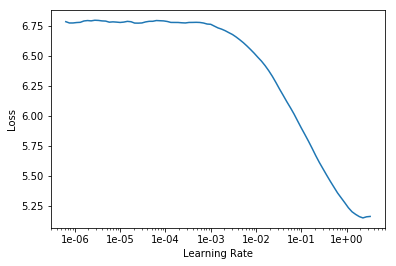

In [15]:
learn.recorder.plot()

In [15]:
learn.freeze()

In [16]:
lr = 1e-1
moms = (0.8,0.7)
scale = (2.6**4)
cycles = 25

In [17]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,4.586734,3.186971,0.143917,00:06
1,3.551581,2.388730,0.304665,00:06
2,2.986395,2.181554,0.361808,00:06
3,2.673569,2.077081,0.397098,00:06
4,2.474318,1.997664,0.420536,00:06
5,2.405106,2.207458,0.377801,00:06
6,2.349890,1.966061,0.426786,00:06
7,2.295150,1.965968,0.427288,00:06
8,2.276107,1.944727,0.429074,00:06
9,2.248946,1.946770,0.430301,00:06


In [18]:
learn.freeze_to(-2)

In [19]:
learn.fit_one_cycle(cycles, slice((lr/2)/(2.6**4),lr/2), moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,2.092247,1.820908,0.460882,00:06
1,2.015755,1.755987,0.478348,00:06
2,1.923372,1.661538,0.506931,00:06
3,1.812851,1.562090,0.534353,00:06
4,1.716902,1.668131,0.513047,00:06
5,1.636063,1.439194,0.572489,00:06
6,1.572514,1.401795,0.580357,00:06
7,1.541872,1.395020,0.585391,00:06
8,1.484732,1.344802,0.598504,00:06
9,1.447821,1.370546,0.594587,00:06


In [20]:
learn.freeze_to(-3)
learn.fit_one_cycle(cycles, slice((lr/4)/(2.6**4),lr/4), moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,1.166087,1.231360,0.634833,00:07
1,1.172058,1.229445,0.635502,00:07
2,1.174226,1.229413,0.636016,00:07
3,1.167544,1.229609,0.636373,00:07
4,1.171588,1.228817,0.634866,00:07
5,1.178822,1.230616,0.634955,00:07
6,1.174345,1.227439,0.637790,00:07
7,1.157496,1.228403,0.637165,00:07
8,1.166912,1.229598,0.639520,00:07
9,1.144347,1.223407,0.640368,00:07


In [21]:
learn.unfreeze()
learn.fit_one_cycle(cycles, slice((lr/8)/(2.6**4),lr/8), moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,1.010069,1.222442,0.648158,00:08
1,1.022450,1.224124,0.647690,00:08
2,1.024099,1.223109,0.647545,00:08
3,1.025979,1.223794,0.646998,00:08
4,1.024626,1.225625,0.647009,00:08
5,1.032492,1.229441,0.645982,00:08
6,1.028265,1.227418,0.647065,00:08
7,1.021050,1.231952,0.646853,00:08
8,1.027107,1.227323,0.646942,00:08
9,1.020401,1.229178,0.647009,00:08


In [22]:
TEXT = "bob"
N_WORDS = 1000
N_SENTENCES = 1

In [23]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

bob b y s   b u r g e r s xxbos   t h e   l i m e xxbos   n o o r   l e b a n e s e   r e s t a u r a n t xxbos   s t r e e t   f o o d xxbos   g a s k o ' s   p i z z a xxbos   s o   j o h n ' s   ( s o h o xxbos   t h e   p o t t e r s   d e l i xxbos   t h i r s t y   b i t e s xxbos   t h e   g o l d e n   f r y   f o o d   b a r xxbos   s t o n e h o u s e   r o y a l   c u i s i n e xxbos   d a l l a s   c h i c k e n   &   p i z z a xxbos   s l a r o m a   p i z z a xxbos   h o t   p o i n t xxbos   c a f e   t r u e   -   r a i n b o w   c e n t r a l xxbos   s t a r   p i z z a   &   g r i l l xxbos   b a l o u   c u r r y   &   f a s t   f o o d xxbos   b e n g a l   b a l t i   &   t a n d o o r i xxbos   l a   v i c t o r i a   l t d xxbos   p i z z a   t i m e xxbos   s h a n g h a i   w o k xxbos   k a m s   c h i c k e n   &   p i z z a xxbos   j o h n n y   b o x   p i z z a xxbos   t h e   b a l t i   h o u s e   r e s t a u r a n t xxbos   h u n g r y   h o u s e xxbo

In [46]:
learn.save_encoder('just_eat_enc_bs128_2')

## Classifier with Just Eat data

In [9]:
data = TextClasDataBunch.from_df(path='.', train_df=bal_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab,
                         mark_fields=False, bs=128)

In [14]:
data.show_batch()

text,target
f l a v a z a u t h e n t i c c a r i b b e a n f o o d & e n g l i s h t a k e a w a y,Pizza
a l l n a t i o n s m i n i m a r k e t u k m a m a z a n z i b a r s h e f f i e l d,Other
a l l n a t i o n s m i n i m a r k e t u k m a m a z a n z i b a r s h e f f i e l d,Other
m r c h i p p y p i z z a k e b a b & t r a d i t i o n a l f i s h & c h i p s,Fish & Chips
m r c h i p p y p i z z a k e b a b & t r a d i t i o n a l f i s h & c h i p s,Fish & Chips


In [10]:
learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.8, bptt=70)


In [23]:
config = awd_lstm_lm_config.copy()
config['emb_sz'] = 200

In [25]:
config

{'emb_sz': 200,
 'n_hid': 1150,
 'n_layers': 3,
 'pad_token': 1,
 'qrnn': False,
 'bidir': False,
 'hidden_p': 0.045,
 'input_p': 0.075,
 'embed_p': 0.006,
 'weight_p': 0.06,
 'tie_weights': True,
 'out_bias': True}

In [24]:
learn = text_classifier_learner(data, AWD_LSTM, config=config ,drop_mult=0.3)

TypeError: __init__() got an unexpected keyword argument 'tie_weights'

In [11]:
learn.load_encoder('just_eat_enc_bs128_2')

In [12]:
learn.freeze()

In [82]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


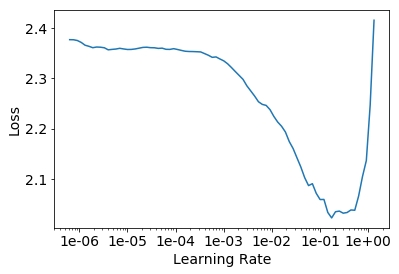

In [85]:
learn.recorder.plot()

In [13]:
lr = 5e-3
moms = (0.2,0.1)
scale = (1**4)
cycles = 5

In [14]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,1.566237,1.326246,0.584200,00:11
1,1.433518,1.288944,0.599800,00:11
2,1.380847,1.245024,0.618200,00:11
3,1.341791,1.232526,0.619800,00:11
4,1.314475,1.231206,0.622400,00:10


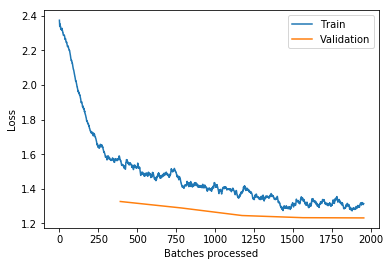

In [15]:
learn.recorder.plot_losses()

In [16]:
learn.freeze_to(-2)

In [17]:
1e-2 / 2 / 5

0.001

In [18]:
learn.fit_one_cycle(cycles, slice((lr/2)/scale,(lr/2)), moms=moms)
#learn.fit_one_cycle(5, slice(5e-3/(2.6**4),5e-3), moms=(0.2,0.1))

epoch,train_loss,valid_loss,accuracy,time
0,1.203189,1.201905,0.637000,00:13
1,1.046463,1.213632,0.657800,00:12
2,0.953995,1.233784,0.658800,00:12
3,0.866484,1.256582,0.661800,00:13
4,0.841503,1.258622,0.663200,00:13


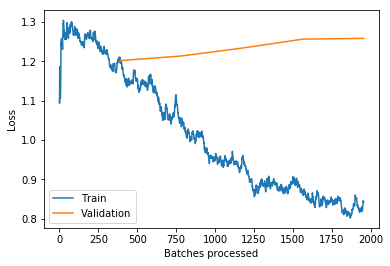

In [19]:
learn.recorder.plot_losses()

In [20]:
learn.freeze_to(-3)
#learn.fit_one_cycle(5, slice(1e-4 / (2.6 ** 4), 1e-4), moms=(0.2, 0.1))
learn.fit_one_cycle(cycles, slice((lr/10)/scale,(lr/10)), moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.807422,1.269379,0.664000,00:22
1,0.839310,1.271357,0.668000,00:21
2,0.777952,1.291637,0.662600,00:20
3,0.725302,1.293309,0.664800,00:21
4,0.749599,1.290677,0.662200,00:21


In [21]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(5e-5 / (2.6 ** 4), 5e-5), moms=(0.2, 0.1))

epoch,train_loss,valid_loss,accuracy,time
0,0.741130,1.288094,0.665200,00:25
1,0.753027,1.291280,0.664600,00:29
2,0.739946,1.291581,0.665400,00:29
3,0.708163,1.279138,0.662800,00:25
4,0.730510,1.301650,0.662200,00:28


In [23]:
    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`"
        x=torch.arange(0,data.c)
        cm = ((self.pred_class==x[:,None]) & (self.y_true==x[:,None,None])).sum(2)
        return cm.cpu().numpy()

    def plot_confusion_matrix(self, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = self.confusion_matrix()
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, self.data.classes, rotation=45)
        plt.yticks(tick_marks, self.data.classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [24]:
preds,y,losses = learn.get_preds(with_loss=True, ordered=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

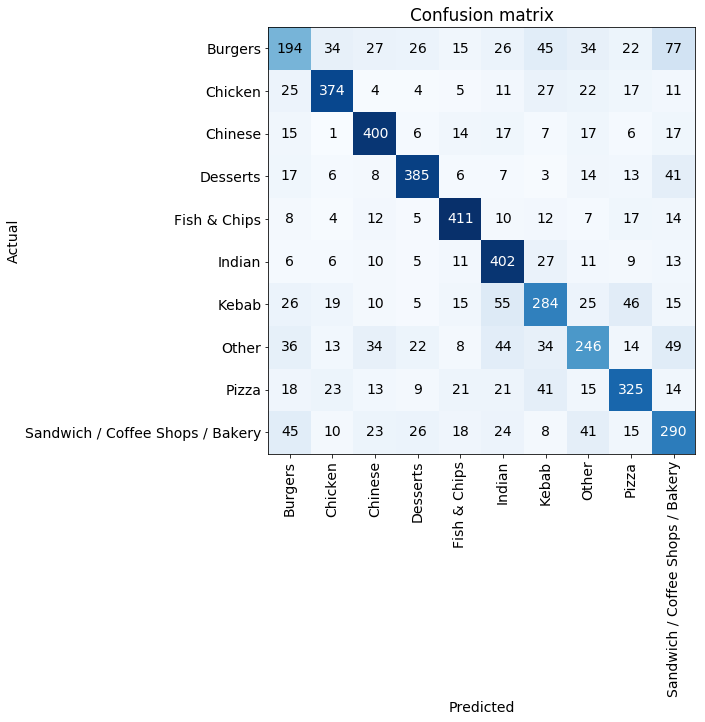

In [25]:
plt.rcParams.update({'font.size': 14})
interp.plot_confusion_matrix(figsize=(10,10))

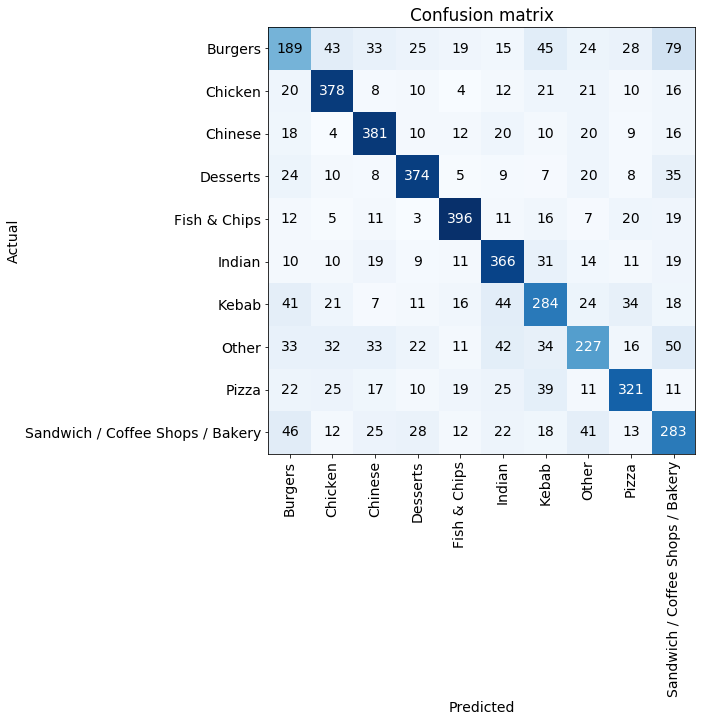

In [15]:
plt.rcParams.update({'font.size': 14})
interp.plot_confusion_matrix(figsize=(10,10))

In [27]:
max_len = 100
items = []
tl_val,tl_idx = interp.top_losses()
for i,idx in enumerate(tl_idx):
    if k <= 0: break
    k -= 1
    tx,cl = interp.data.dl(interp.ds_type).dataset[idx]
    cl = cl.data
    classes = interp.data.classes
    txt = ' '.join(tx.text.split(' ')[:max_len]) if max_len is not None else tx.text
    tmp = [txt, f'{classes[interp.pred_class[idx]]}', f'{classes[cl]}', f'{interp.losses[idx]:.2f}',
           f'{preds[idx][cl]:.2f}']
    items.append(tmp)
items = np.array(items)
names = ['Text', 'Prediction', 'Actual', 'Loss', 'Probability']
df = pd.DataFrame({n:items[:,i] for i,n in enumerate(names)}, columns=names)

In [30]:
df[(df.Actual=='Kebab') & (df.Actual!=df.Prediction)]

,Text,Prediction,Actual,Loss,Probability
29,xxbos r o o s t e r s c h i c k e n & ...,Chicken,Kebab,10.06,0.00
33,xxbos w o r l d w i d e m u n c h i e s,Desserts,Kebab,9.74,0.00
36,xxbos g r i l l a n d d e s s e r t s,Desserts,Kebab,9.57,0.00
53,xxbos m a y a i n d i a n t a k e a w a y,Indian,Kebab,8.69,0.00
62,xxbos m r . c h i p p y,Fish & Chips,Kebab,8.35,0.00
67,xxbos s e a p a l a c e f i s h & c ...,Fish & Chips,Kebab,8.12,0.00
68,xxbos t i f f i n - b i t e s i n d i a n ...,Indian,Kebab,8.11,0.00
80,xxbos m r r o o s t e r,Chicken,Kebab,7.90,0.00
83,xxbos c h o p a n,Chinese,Kebab,7.84,0.00
101,xxbos s i m p l e c a t e r i n g c a f e,Sandwich / Coffee Shops / Bakery,Kebab,7.48,0.00


In [22]:
learn.save('single_cat_19_12_19')

In [11]:
learn.load('single_cat_small')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (50131 items)
x: TextList
xxbos   xxunk f a l a f i l,xxbos   xxunk f a l a f i l,xxbos   xxunk f a l a f i l,xxbos   xxunk f a l a f i l,xxbos   xxunk f a l a f i l
y: CategoryList
Other,Other,Other,Other,Other
Path: .;

Valid: LabelList (5000 items)
x: TextList
xxbos   2 4 7,xxbos   xxunk d e s s e r t s,xxbos   1 0   t o   1 0   i n   d e l h i,xxbos   1 3   0 2   d e s s e r t   c a f e,xxbos   1 4 2 3   c h i n a   k i t c h e n
y: CategoryList
Burgers,Desserts,Indian,Desserts,Chinese
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(46, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(46, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1150, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1150, 1150, batch_first=True)
        )
  

In [12]:
learn.predict("punjab takeaway")

(Category Indian,
 tensor(5),
 tensor([2.7637e-02, 2.2467e-03, 5.5933e-02, 6.1825e-04, 2.3017e-02, 7.2258e-01,
         7.8372e-02, 2.5950e-02, 6.2978e-02, 6.6851e-04]))

In [33]:
learn.predict("fryer tuck")

(Category Fish & Chips,
 tensor(4),
 tensor([6.8663e-07, 7.4220e-06, 1.4271e-06, 3.1180e-08, 9.9956e-01, 1.3039e-05,
         1.4349e-04, 1.7160e-06, 2.7602e-04, 6.8339e-10]))

In [34]:
learn.predict("pearl palace")

(Category Chinese,
 tensor(2),
 tensor([3.2500e-05, 1.4055e-05, 9.8027e-01, 6.5169e-06, 2.2522e-04, 1.0049e-02,
         6.4659e-03, 1.5558e-05, 2.9257e-03, 3.7920e-08]))

In [35]:
learn.predict("jerk house")

(Category Other,
 tensor(7),
 tensor([3.4553e-09, 1.3469e-07, 7.3781e-07, 1.7028e-08, 2.3752e-10, 1.8079e-06,
         1.4843e-05, 9.9998e-01, 4.0756e-07, 5.9884e-08]))

In [36]:
learn.predict("abra kebabra")

(Category Kebab,
 tensor(6),
 tensor([2.2116e-06, 7.3141e-06, 3.2211e-06, 1.2088e-06, 2.9779e-07, 3.8748e-01,
         6.0056e-01, 1.9660e-05, 1.1926e-02, 2.5793e-07]))

In [37]:
learn.predict("mcdoner")

(Category Kebab,
 tensor(6),
 tensor([5.5915e-03, 4.3542e-04, 4.2549e-05, 3.7245e-05, 4.5367e-02, 4.5134e-04,
         7.7202e-01, 3.6717e-04, 1.7485e-01, 8.3168e-04]))

In [38]:
learn.predict("southern fried chicken")

(Category Chicken,
 tensor(1),
 tensor([1.7157e-05, 9.9861e-01, 6.5341e-05, 5.7953e-10, 1.0491e-06, 1.6367e-05,
         5.4860e-04, 1.2166e-07, 7.3790e-04, 2.3313e-06]))

In [41]:
learn.predict("luigis")

(Category Pizza,
 tensor(8),
 tensor([2.3967e-04, 4.9006e-05, 7.3371e-04, 3.1309e-06, 1.4226e-02, 6.9645e-04,
         3.1890e-02, 4.1306e-06, 9.5216e-01, 5.6965e-08]))

In [42]:
learn.predict("mrs boggins sandwich shop")

(Category Sandwich / Coffee Shops / Bakery,
 tensor(9),
 tensor([2.9202e-02, 1.7109e-06, 1.3059e-04, 5.7879e-04, 4.4685e-04, 3.3942e-05,
         2.0662e-04, 2.0311e-05, 1.6784e-04, 9.6921e-01]))

In [43]:
learn.predict("codfather")

(Category Fish & Chips,
 tensor(4),
 tensor([1.7935e-10, 1.8927e-12, 2.4160e-08, 3.7045e-12, 9.9997e-01, 3.3385e-07,
         7.3764e-07, 1.1344e-11, 2.4465e-05, 1.9621e-12]))

In [44]:
learn.predict("tasty plaice")

(Category Fish & Chips,
 tensor(4),
 tensor([1.2165e-11, 9.5156e-10, 9.7397e-07, 6.5484e-11, 9.9936e-01, 2.7855e-06,
         3.0965e-04, 1.0603e-07, 3.3140e-04, 8.4260e-15]))

In [45]:
learn.predict("saajan halal")

(Category Indian,
 tensor(5),
 tensor([1.2152e-07, 3.6190e-07, 9.7735e-05, 1.2249e-10, 4.5945e-06, 9.9088e-01,
         5.7530e-03, 8.7105e-07, 3.2651e-03, 2.9855e-08]))

In [46]:
learn.predict("roll on lunch time")

(Category Sandwich / Coffee Shops / Bakery,
 tensor(9),
 tensor([3.3972e-03, 8.8946e-04, 1.4877e-02, 9.3924e-05, 1.9447e-03, 5.6478e-03,
         1.9722e-03, 1.1457e-03, 4.6126e-03, 9.6542e-01]))

In [47]:
learn.predict("wok n roll")

(Category Chinese,
 tensor(2),
 tensor([1.0981e-07, 5.8511e-08, 9.2300e-01, 1.1433e-07, 3.1203e-06, 2.4254e-04,
         2.1707e-05, 7.6622e-02, 1.0897e-04, 2.4936e-08]))

In [48]:
learn.predict("abc barbeque")

(Category Kebab,
 tensor(6),
 tensor([3.8391e-07, 5.2253e-02, 1.8065e-05, 5.6781e-05, 2.2821e-04, 1.3689e-01,
         5.6172e-01, 1.2873e-04, 2.4870e-01, 5.8459e-07]))

In [49]:
learn.predict("kwong yick")

(Category Chinese,
 tensor(2),
 tensor([1.8322e-07, 5.5954e-05, 9.9980e-01, 4.7801e-05, 4.9278e-07, 7.4950e-05,
         5.7964e-06, 4.2463e-07, 1.8758e-05, 7.8920e-08]))

In [50]:
learn.predict("bodrum grill")

(Category Kebab,
 tensor(6),
 tensor([9.2563e-08, 1.0086e-05, 9.4562e-07, 5.6683e-11, 3.6219e-06, 2.0422e-04,
         9.5005e-01, 2.8707e-05, 4.9704e-02, 4.2921e-10]))

In [51]:
learn.predict("baraka peri peri")

(Category Chicken,
 tensor(1),
 tensor([5.5352e-04, 9.8408e-01, 2.2671e-06, 6.9417e-06, 9.3635e-08, 7.3043e-04,
         7.2860e-03, 2.0670e-07, 7.3425e-03, 1.7224e-07]))

In [52]:
learn.predict("chick king")

(Category Chicken,
 tensor(1),
 tensor([4.4410e-03, 9.4296e-01, 2.0792e-03, 5.0648e-07, 7.9029e-05, 1.6162e-03,
         7.3403e-04, 4.4761e-05, 4.8047e-02, 3.3201e-09]))

In [53]:
learn.predict("red ruby")

(Category Indian,
 tensor(5),
 tensor([1.2673e-03, 1.0172e-04, 3.8216e-01, 9.4888e-07, 2.9147e-04, 4.4273e-01,
         8.4532e-02, 5.6610e-06, 8.8913e-02, 8.0769e-07]))

In [54]:
learn.predict("southern rooster")

(Category Chicken,
 tensor(1),
 tensor([4.0049e-03, 9.9328e-01, 3.5882e-07, 7.7051e-12, 7.9822e-07, 1.4502e-06,
         3.8251e-04, 2.9660e-12, 2.3343e-03, 5.1639e-07]))

In [55]:
learn.predict("busters")

(Category Sandwich / Coffee Shops / Bakery,
 tensor(9),
 tensor([3.7681e-03, 8.7867e-05, 2.5225e-04, 5.4400e-05, 2.9121e-04, 9.3701e-04,
         1.6839e-03, 2.5030e-06, 1.8760e-03, 9.9105e-01]))

In [56]:
learn.predict("shinzo abe")

(Category Pizza,
 tensor(8),
 tensor([0.0007, 0.1142, 0.0616, 0.0016, 0.0010, 0.1096, 0.2216, 0.0784, 0.3201,
         0.0913]))

In [57]:
learn.predict("massive pies")

(Category Sandwich / Coffee Shops / Bakery,
 tensor(9),
 tensor([4.1241e-05, 1.0954e-06, 2.6628e-05, 2.9141e-05, 3.9508e-07, 3.0570e-04,
         5.6300e-05, 3.8979e-07, 1.7859e-03, 9.9775e-01]))

In [58]:
learn.predict("thai kitchen")

(Category Chinese,
 tensor(2),
 tensor([1.2124e-09, 8.0651e-08, 9.9999e-01, 8.4998e-11, 1.1040e-07, 8.8045e-06,
         4.6350e-07, 2.5178e-09, 1.9559e-07, 1.2994e-07]))

In [59]:
learn.predict("wok this way")

(Category Chinese,
 tensor(2),
 tensor([1.2711e-09, 5.5798e-05, 9.9991e-01, 5.7323e-10, 1.4724e-05, 3.7488e-06,
         1.5461e-06, 3.6319e-06, 9.6424e-06, 1.5098e-08]))

In [60]:
learn.predict("a salt & battery")

(Category Fish & Chips,
 tensor(4),
 tensor([2.1390e-03, 3.1528e-04, 3.6326e-03, 8.3669e-03, 8.1874e-01, 2.7901e-02,
         4.2675e-02, 1.2939e-02, 5.1730e-02, 3.1560e-02]))

In [61]:
learn.predict("the frying squad")

(Category Fish & Chips,
 tensor(4),
 tensor([5.3192e-07, 1.1723e-04, 9.3116e-02, 1.4214e-06, 8.6119e-01, 7.1343e-03,
         1.5327e-02, 3.8634e-06, 2.3091e-02, 1.6802e-05]))

In [62]:
learn.predict("fishcotheque")

(Category Fish & Chips,
 tensor(4),
 tensor([9.7447e-06, 1.0139e-05, 3.8385e-05, 6.6630e-08, 9.4658e-01, 7.0758e-04,
         2.0913e-02, 7.1014e-05, 3.1668e-02, 1.1800e-08]))

In [63]:
learn.predict("fission chips")

(Category Fish & Chips,
 tensor(4),
 tensor([2.4371e-02, 4.7528e-04, 1.0717e-01, 8.9956e-05, 7.8728e-01, 1.5899e-02,
         4.2639e-02, 3.7594e-04, 1.9413e-02, 2.2831e-03]))

In [64]:
learn.predict("coffee suprise")

(Category Sandwich / Coffee Shops / Bakery,
 tensor(9),
 tensor([1.8798e-04, 7.4643e-07, 8.5275e-04, 6.4895e-05, 9.6265e-06, 5.2331e-04,
         5.7562e-06, 9.4653e-05, 1.7184e-03, 9.9654e-01]))

In [65]:
learn.predict("swoon")

(Category Chinese,
 tensor(2),
 tensor([1.4993e-05, 1.3519e-07, 7.1451e-01, 1.3688e-01, 4.9589e-05, 2.5889e-02,
         6.5187e-03, 6.2038e-03, 1.0993e-01, 1.1451e-05]))

In [67]:
learn.predict("fire & dough")

(Category Pizza,
 tensor(8),
 tensor([5.1594e-02, 7.9339e-07, 5.0222e-05, 8.3610e-04, 7.4137e-06, 3.5144e-04,
         1.6233e-02, 5.1880e-07, 9.3064e-01, 2.8138e-04]))

In [72]:
learn.predict("top chef")

(Category Chinese,
 tensor(2),
 tensor([7.8178e-08, 2.4388e-05, 9.9980e-01, 5.4857e-08, 1.4206e-07, 6.0739e-05,
         1.9200e-05, 1.7441e-09, 4.2943e-05, 4.8140e-05]))

In [75]:
learn.predict("sapna")

(Category Indian,
 tensor(5),
 tensor([2.4931e-03, 4.4045e-03, 4.5288e-04, 6.3147e-06, 1.1516e-04, 4.9181e-01,
         1.4638e-02, 1.4906e-03, 4.8458e-01, 2.3746e-06]))